In [112]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns

In [113]:
data = pd.read_csv(r'/Users/austineaton/Projects/spotify_project/allsongs_revised.csv')

In [114]:
data.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [115]:
data.head(5)

,Unnamed: 0,name,artist,release_date,length,acousticness,danceability,instrumentalness,loudness,liveness,tempo,energy,speechiness,valence,time_signature,popularity
0,0,"Hey, Soul Sister",Train,2010,217.0,0.157553,0.67,0.169679,-4.0,0.08,97.0,0.89,0.04,0.80,3.982955,83
1,1,Love The Way You Lie,Eminem,2010,263.0,0.157553,0.75,0.169679,-5.0,0.52,87.0,0.93,0.23,0.64,3.982955,82
2,2,TiK ToK,Kesha,2010,200.0,0.070000,0.76,0.000006,-3.0,0.29,120.0,0.84,0.14,0.71,4.000000,80
3,3,Bad Romance,Lady Gaga,2010,295.0,0.157553,0.70,0.169679,-4.0,0.08,119.0,0.92,0.04,0.71,3.982955,79
4,4,Just the Way You Are,Bruno Mars,2010,221.0,0.157553,0.64,0.169679,-5.0,0.09,109.0,0.84,0.04,0.43,3.982955,78


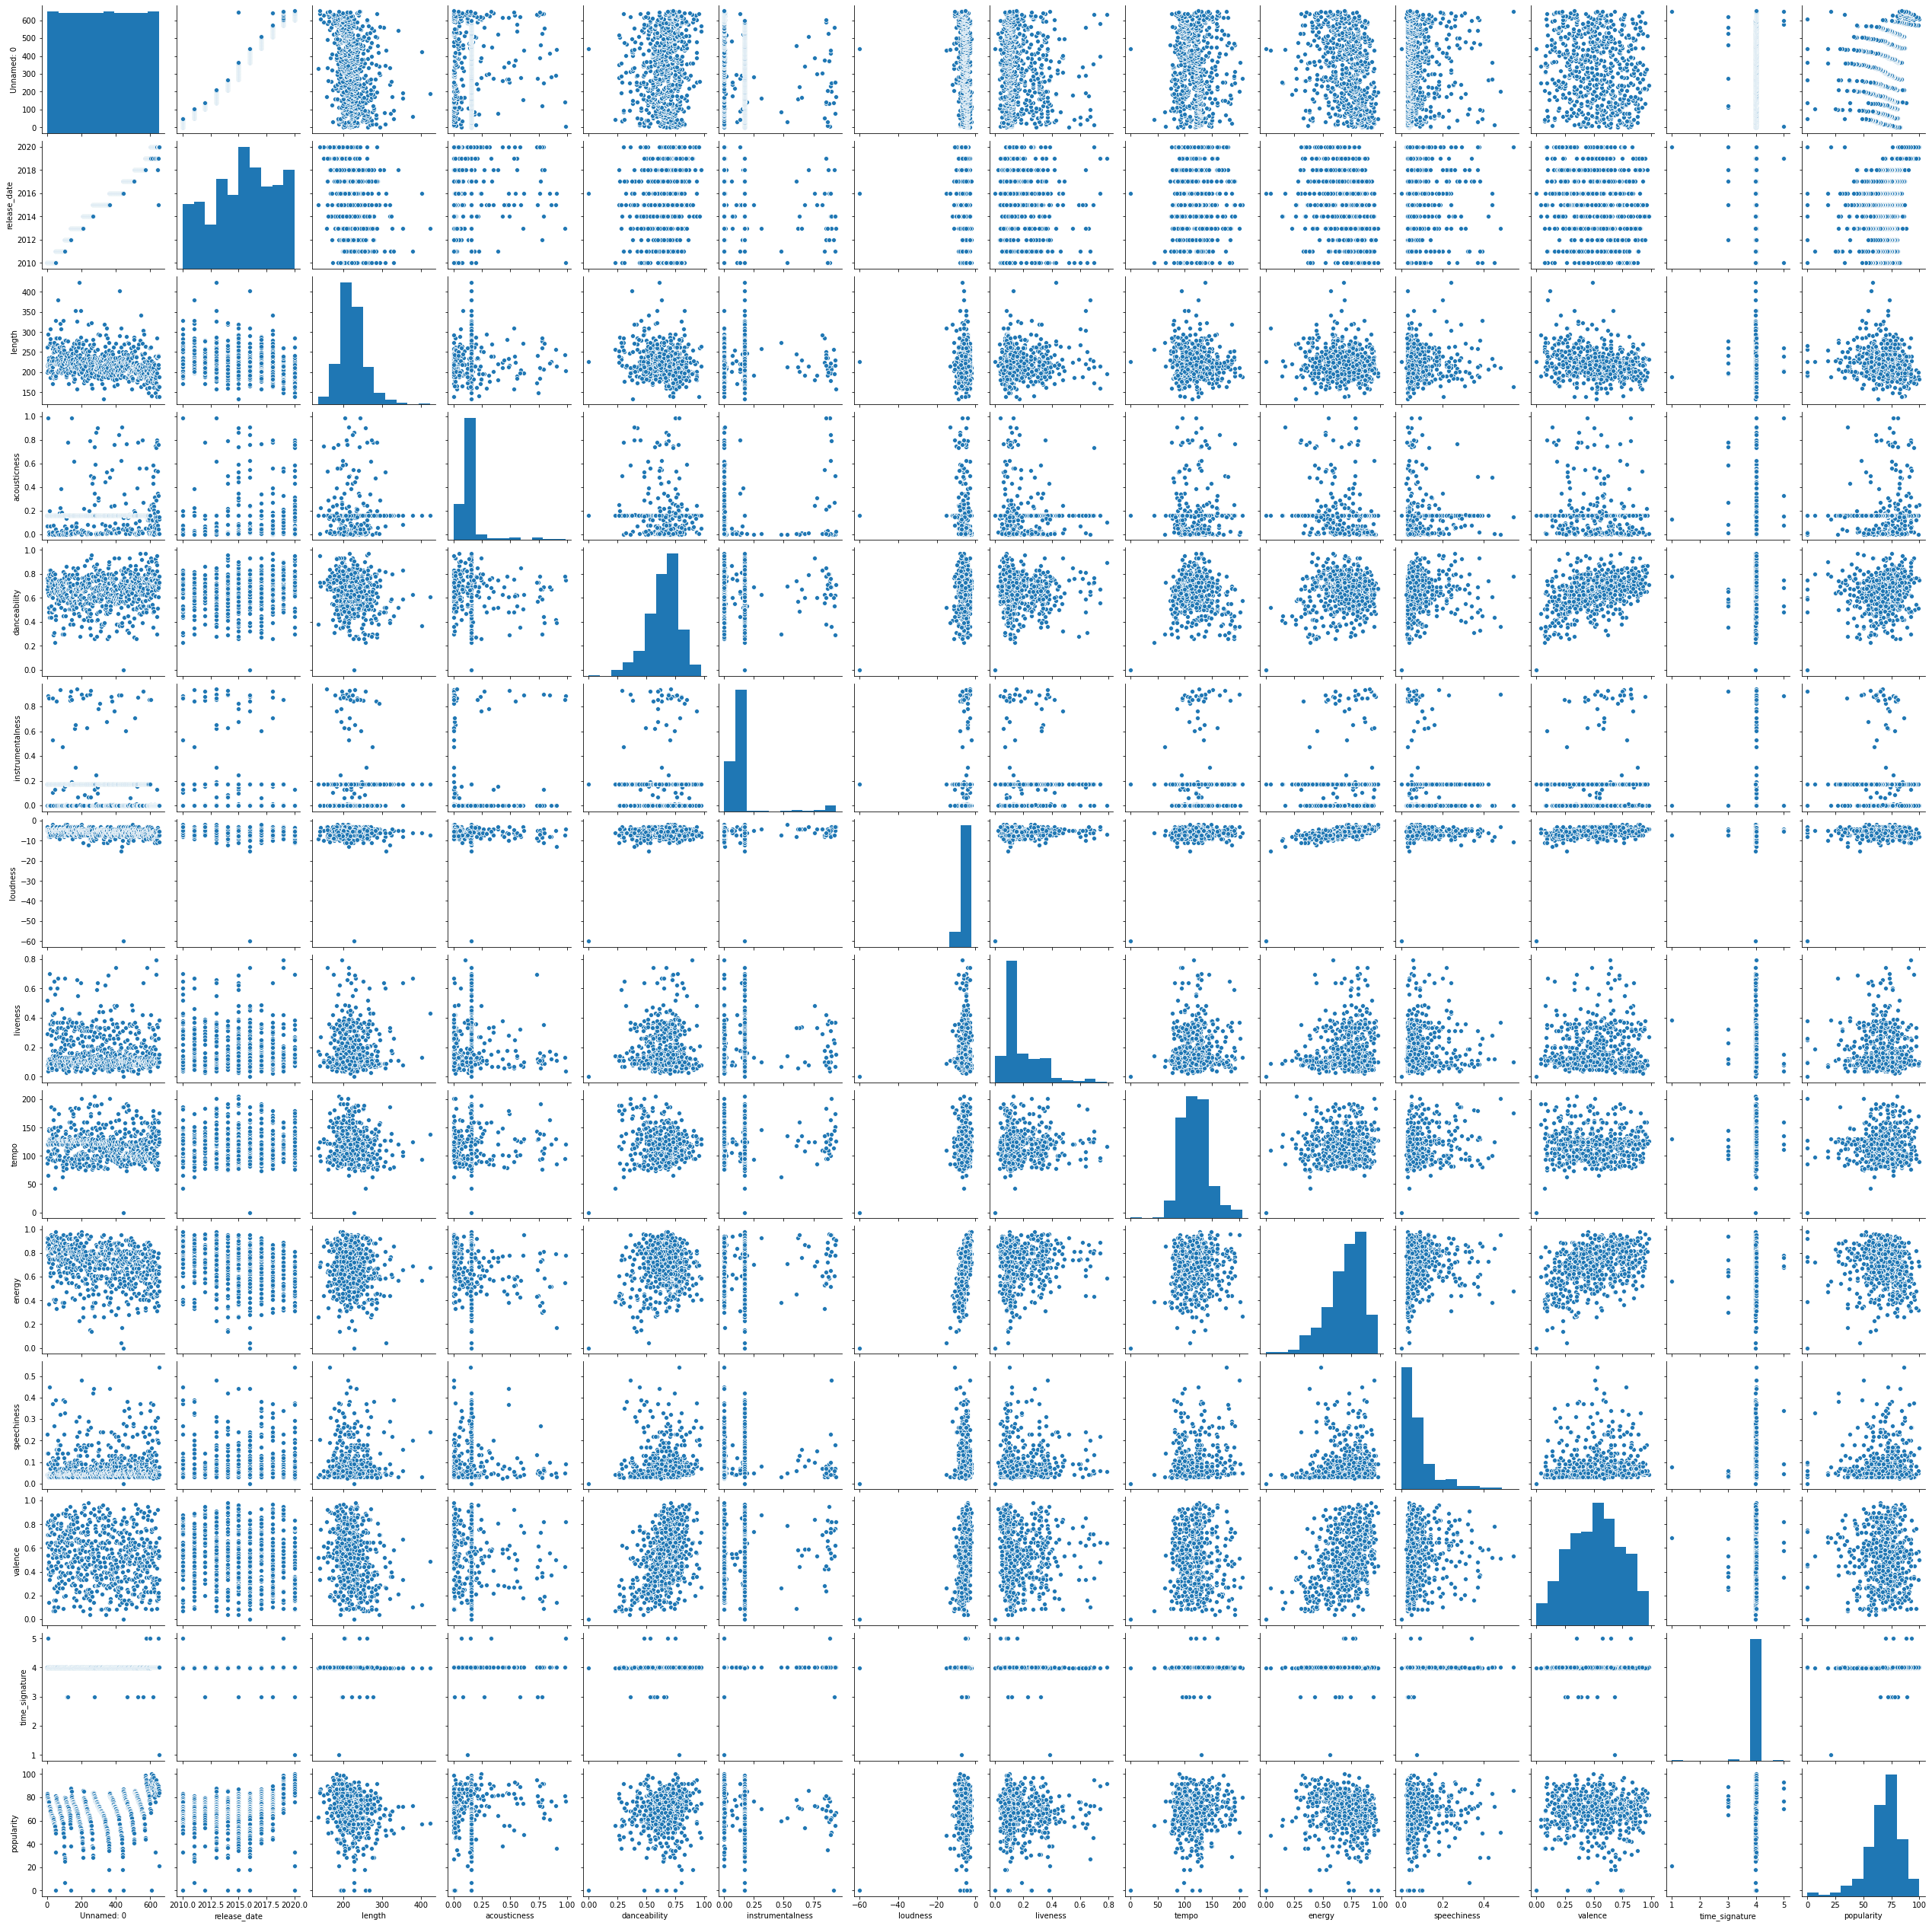

In [116]:
sns.pairplot(data)

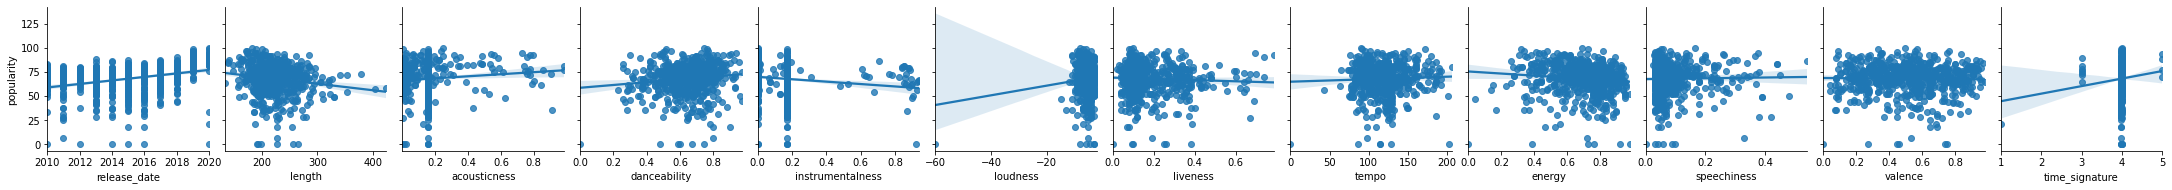

In [117]:
g = sns.pairplot(data, 
             x_vars=['release_date', 'length', 'acousticness', 'danceability', 'instrumentalness', 'loudness', 'liveness', 'tempo', 'energy', 'speechiness', 'valence', 'time_signature'], 
            y_vars=['popularity'],
            kind='reg')



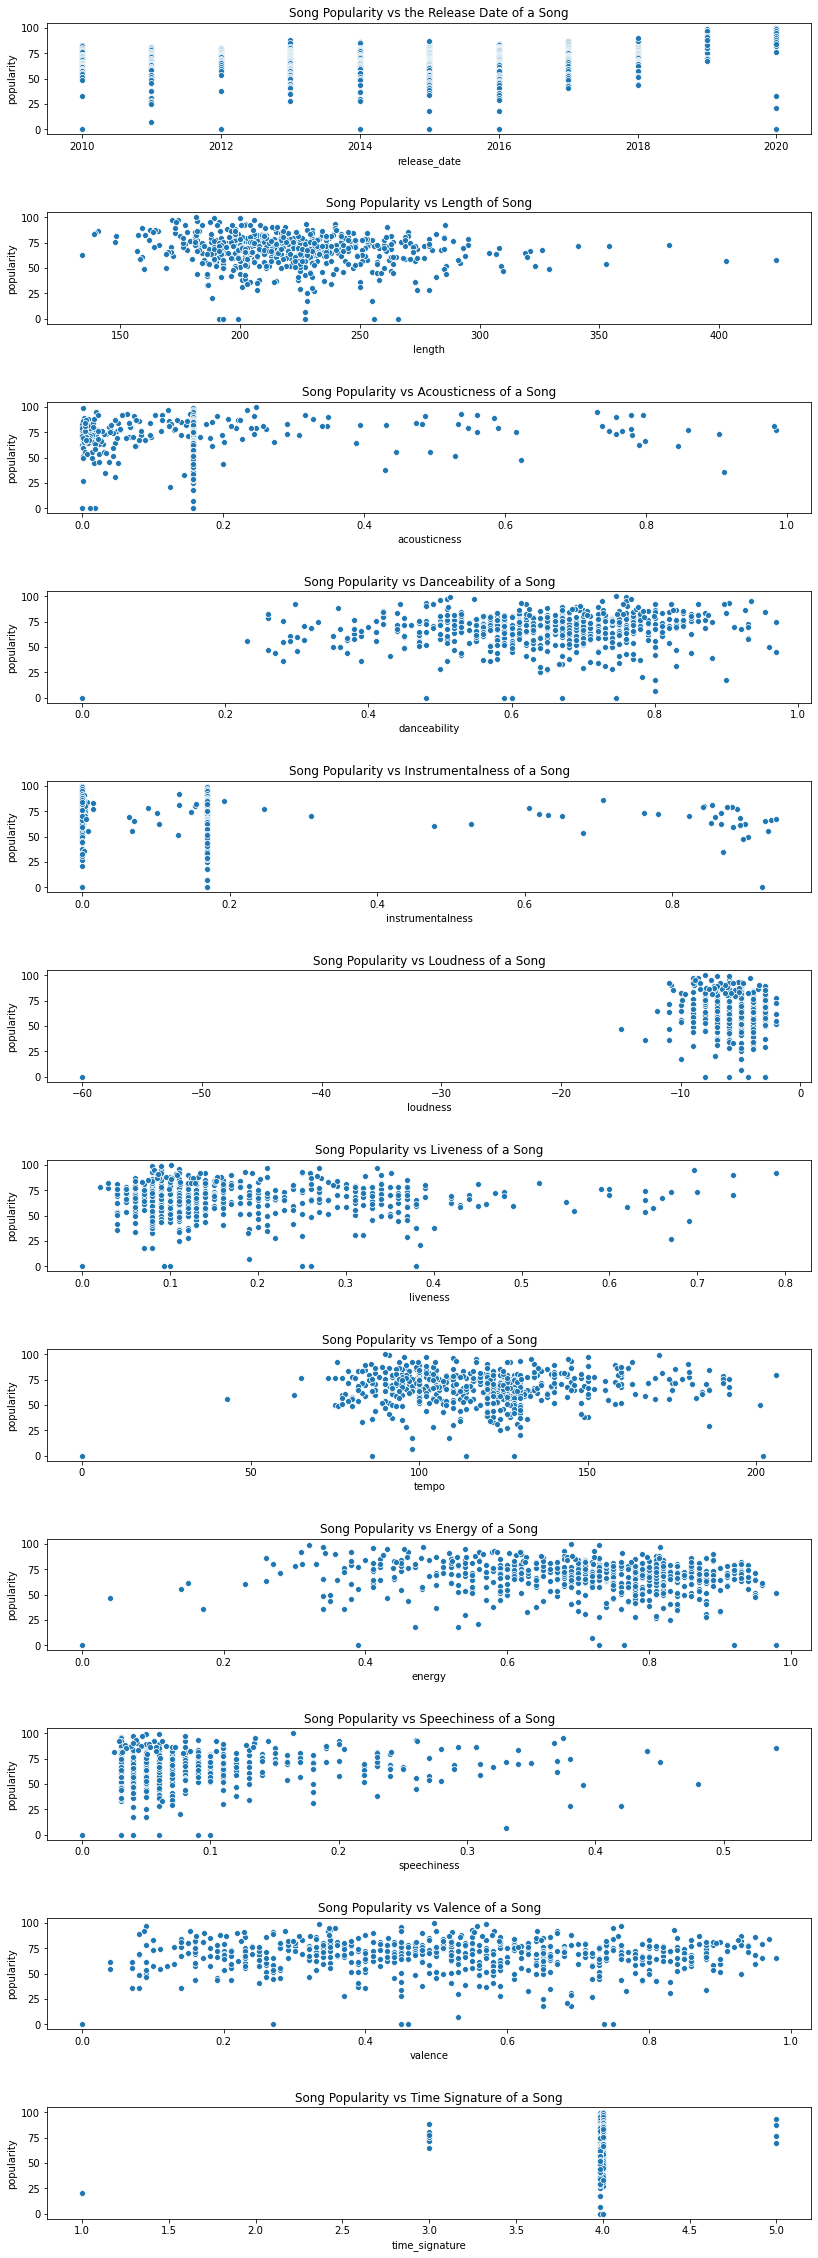

In [119]:
fig, ax = pit.subplots(12,1,figsize=(12,32))

cols = ['release_date', 'length', 'acousticness', 'danceability', 'instrumentalness', 'loudness', 'liveness', 'tempo', 'energy', 'speechiness', 'valence', 'time_signature']
data = data[:1000]
i = 0
title = ['Song Popularity vs the Release Date of a Song',
         'Song Popularity vs Length of Song',
         'Song Popularity vs Acousticness of a Song',
         'Song Popularity vs Danceability of a Song',
         'Song Popularity vs Instrumentalness of a Song',
         'Song Popularity vs Loudness of a Song',
         'Song Popularity vs Liveness of a Song',
         'Song Popularity vs Tempo of a Song',
         'Song Popularity vs Energy of a Song',
         'Song Popularity vs Speechiness of a Song',
         'Song Popularity vs Valence of a Song',
         'Song Popularity vs Time Signature of a Song']
for col in cols:
    sns.scatterplot(ax = ax[i], x = col, y = 'popularity', data = data).set_title(title[i])
    i+=1
fig.tight_layout(pad=3.0)

In [120]:
X = data[['release_date','length', 'acousticness', 'danceability', 'instrumentalness', 'loudness', 'liveness', 'tempo', 'energy', 'speechiness', 'valence', 'time_signature']]
y = data['popularity']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1170.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):                        0.00
Time:                        11:45:27   Log-Likelihood:                         -2675.1
No. Observations:                 653   AIC:                                      5374.
Df Residuals:                     641   BIC:                                      5428.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
release_date         0.0288      0.008      3.831      0.000       0.014       0.044
length              -0.0661      0.017     -3.847      0.000      -0.100      -0.032
acousticness        11.2078      4.168      2.689      0.007       3.024      19.392
danceability        14.1851      5.015      2.828      0.005       4.337      24.033
instrumentalness   -12.0276      3.383     -3.555      0.000     -18.671      -5.384
loudness             1.1160      0.258      4.327      0.000       0.610       1.622
liveness            -0.6397      4.487     -0.143      0.887      -9.450       8.171
tempo                0.0273      0.024      1.148      0.251      -0.019       0.074
energy             -19.1826      4.623     -4.149      0.000     -28.261     -10.105
speechiness          5.6958      7.483      0.761      0.447      -8.998      20.390
valence             -5.0253      3.241     -1.551      0.121     -11.389       1.338
time_signature       8.5773      3.324      2.580      0.010       2.050      15.105
==============================================================================
Omnibus:                      193.142   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.302
Skew:                          -1.440   Prob(JB):                    2.39e-124
Kurtosis:                       6.554   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the different figures above, it can be difficult to determine exactly how certain atributes of a song can effect it's popularity. Luckily, we can run a multiple regression analysis on the different variables to more precisely determine the relationship between our dependent variable (popularity) and the independent variables in our dataset. After performing the multiple regression analysis, we can see that that song attributes such as 'release_date', 'length', 'acousticness', 'danceability', 'instrumentalness', 'loudness', 'energy', and 'time_signature' all have p-values less than 0.05, which suggests strong evidence that these variables are correlated to song popularity. Song attributes such as 'valence', 'speechiness', 'tempo', and 'liveness' all have p-values greater than 0.05, indicating weak evidence in support of these variables correlating to popularity. 

Furthermore, we can can look at the coefficients on each variable to determine if it helped or hurt the songs chance of having a high popularity score. Of the variables that had a p-value less than 0.05, as the variables of 'release_date', 'acousticness', 'danceability', 'loudness', 'time_signature' increased, so too would the popularity of the song. While on the other hand, if the variables of 'length', 'instrumentalness', 'energy' increased, then the popularity of the song would subsequently decrease. That is, with all else held constant (Ceteris paribus).